가상의 문제

서울에 배달 전문 가게를 하나 창업하려고 한다.
어떤 고객들을 대상으로 타게팅할 지 명확하지 않으며, 어떤 음식을 배달 전문으로 할 지 정하지 않았다.
이 문제를 해결하기 위해선 어떤 분석을 수행해야하는가?

문제 정의

1. 어떤 메뉴로 선정해야하는가?

2. 배달이 적었던 날은 어떤 원인이 있었을까??

3. 업종의 배달 전략을 어떻게 세워야할까?(서울시)

4. 배달량을 늘리기 위해선 어떻게 해야할까??

문제정의를 통한 EDA 해볼 것 -> EDA를 통해 어떤 인사이트를 도출할 수 있을까?


1. 배달량을 늘리기 위해선 어떻게 해야할까? -> 어느 시간에 가장 많이 주문했을까? EDA
2. 주문건수가 가장 많은 광역시도-시군구는 어디일까? EDA
3. 배달이 적었던 날은 어떤 원인이 있었을까?? -> 어느 날짜에 주문이 가장 많았을까? EDA
4. 업종의 배달 전략을 어떻게 세워야할까? -> 서울시 구별로 어떤 음식을 가장 좋아할까? EDA
5. 업종의 배달 전략을 어떻게 세워야할까? -> 가장 배달을 안시키는 메뉴는 어떤 메뉴일까? EDA
6. 업종의 배달 전략을 어떻게 세워야할까? -> 어떤 시간대에 어떤 음식을 가장 많이 먹을까?

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

!pip install koreanize-matplotlib
import koreanize_matplotlib

!pip install pytimekr
import pytimekr

delivery = pd.read_csv('/content/drive/MyDrive/업종 목적지별 배달 주문건수.csv', names=['날짜','시간대별 시간','업종명','광역시도명','시군구명','주문건수'])

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 7.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pytimekr: filename=pytimekr-0.1.0-py3-none-any.whl size=7922 sha256=cf39711b661677cf4343b4622fb67e53c78f2be55a2d1c107c5d69b8367544c5
  Stored in directory: /root/.cache/pip/wheels/b3/a3/ba/e73aaae1dec550b8667510c379b019295bba855275258745de
Successfully built pytimekr


In [3]:
delivery['요일'] = pd.to_datetime(delivery['날짜']).dt.weekday

In [4]:
delivery.head()

,날짜,시간대별 시간,업종명,광역시도명,시군구명,주문건수,요일
0,2021-01-01,0,돈까스/일식,경기도,동두천시,3,4
1,2021-01-01,0,돈까스/일식,경기도,부천시,49,4
2,2021-01-01,0,돈까스/일식,경기도,안산시 상록구,5,4
3,2021-01-01,0,돈까스/일식,경기도,의정부시,6,4
4,2021-01-01,0,돈까스/일식,경상남도,진주시,3,4


In [5]:
delivery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1026046 entries, 0 to 1026045
Data columns (total 7 columns):
 #   Column   Non-Null Count    Dtype 
---  ------   --------------    ----- 
 0   날짜       1026046 non-null  object
 1   시간대별 시간  1026046 non-null  int64 
 2   업종명      1026046 non-null  object
 3   광역시도명    1026046 non-null  object
 4   시군구명     1026046 non-null  object
 5   주문건수     1026046 non-null  int64 
 6   요일       1026046 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 54.8+ MB


# 어떤 메뉴로 창업해야할까?


1. top3는 카페/디저트,한식,치킨순이었음
2. 2021년 1월부터 7월까지의 트렌드 순으로 따지면 치킨/찜,탕/카페,디저트의 경우 4월 이후에 줄어드는 경향을 보였고, 돈까스/일식의 경우 1~3월에는 구매 횟수가 굉장히 적었지만, 4월 이후에 급격히 성장하여 4월 이후에는 총 주문건수가 압도적으로 1위를 하고 있음을 볼 수 있었다.

<Axes: xlabel='업종명', ylabel='주문건수'>

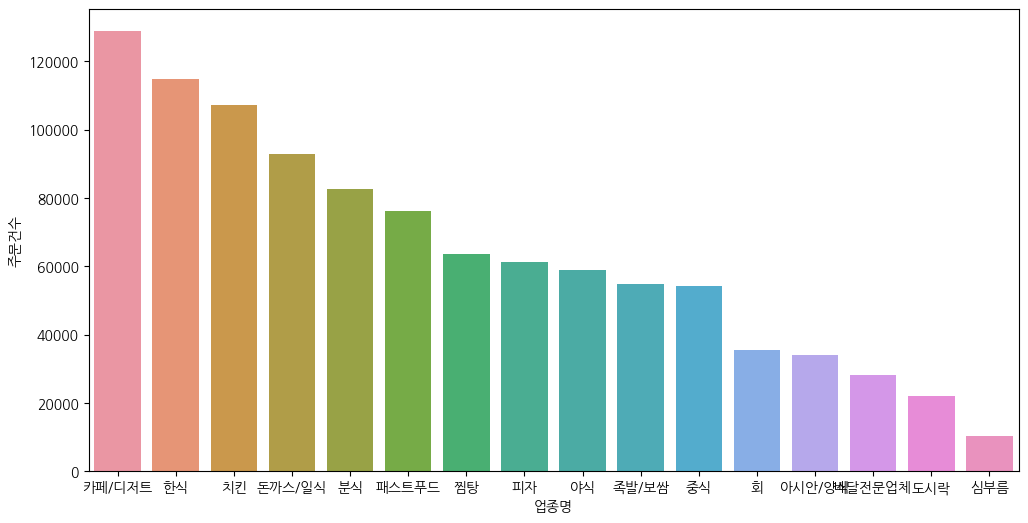

In [6]:
#바 차트
menu = delivery.groupby('업종명')['주문건수'].count().sort_values(ascending=False).to_frame()
menu
plt.figure(figsize=(12,6))
sns.barplot(data=menu, x=menu.index, y=menu['주문건수'])

<Axes: xlabel='월', ylabel='주문건수'>

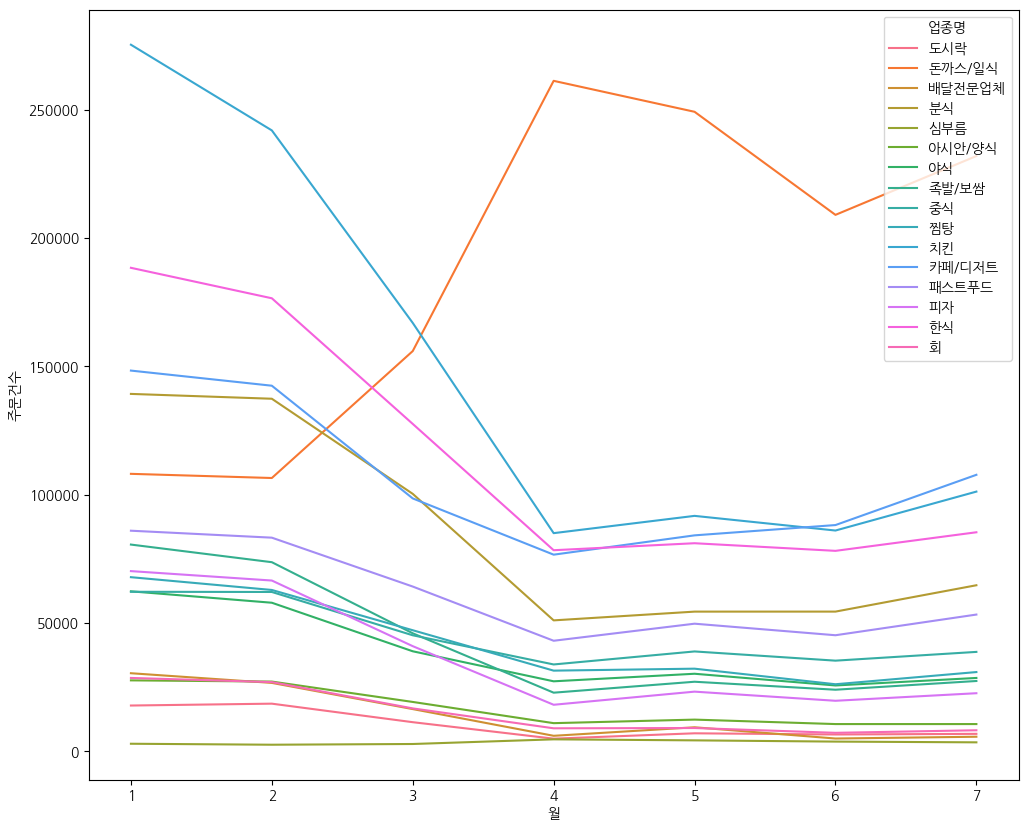

In [7]:
#추세선

delivery['날짜'] = pd.to_datetime(delivery['날짜'], format='%Y-%m-%d')
delivery['월'] = delivery['날짜'].dt.month
menu_trend = delivery.groupby(['월','업종명'])['주문건수'].sum().reset_index().set_index('월')
plt.figure(figsize=(12,10))
sns.lineplot(data=menu_trend, x=menu_trend.index,y='주문건수',hue='업종명')

# 배달 전략

1. 새벽 시간대에는 배달횟수가 상당히 줄어듦을 알 수 있다. 왜냐하면 새벽에는 배달되는 곳이 잘 없기 때문 (0시 이후)
2. 치킨은 저녁이 될 수록 수요가 급격히 늘어나기 시작하며 6~7시에 피크를 찍는다.또한 어떤 시간대든 꾸준히 팔 수 있는, 모든 시간에 주문 수요가 있는 음식이다.
3. 카페/디저트는 꾸준히 잘 배달되는 배달 음식 중에 하나다. 아침시간 이후로 꾸준히 성장세를 보인다.
4. 한식의 경우 아침을 제외한 시간에만 수요가 굉장히 커짐을 볼 수 있다. (주로 점심, 저녁)

치킨집을 차릴 것이다! -> 치킨의 경우: 6~7시의 피크타임을 이용하는 배달 전략을 수립할 것. (EX.주문 제작이 원활하도록 5시부터 치킨 생산량을 많이 가져가는 전략)
카페/디저트 가게를 차릴 것이다! -> 아침 타임부터 적극적으로 디저트를 배달하는 전략을 이용할 것.   

<Axes: xlabel='시간대별 시간', ylabel='빈도'>

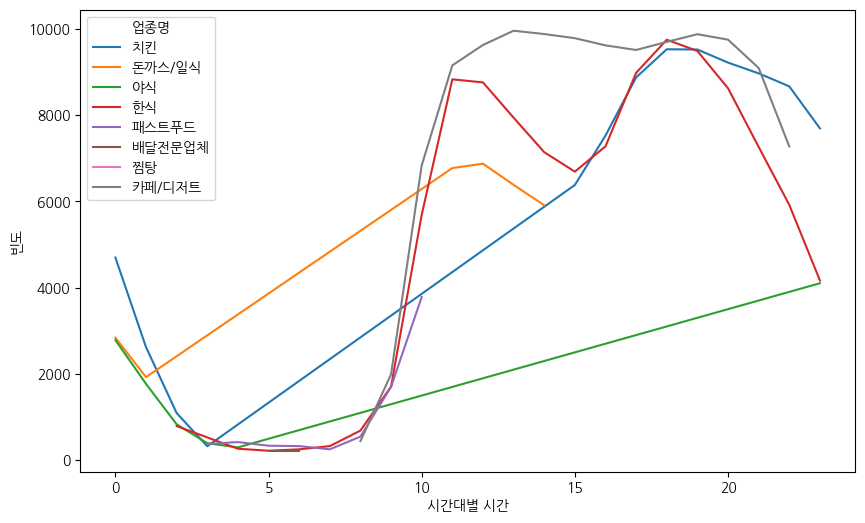

In [9]:
#어느 시간에 어떤 음식을 가장 많이 주문했을까?(top3)
timeorder = delivery.groupby('시간대별 시간')['업종명'].value_counts().to_frame().rename(columns={'업종명':'빈도'}).reset_index()
li = []
for i in range(24):
  order = timeorder[timeorder['시간대별 시간']==i]
  value = order.sort_values('빈도', ascending=False)[:3]
  li.append(value)

timeorder = pd.concat(li)
timeorder = timeorder.set_index('시간대별 시간')
timeorder

plt.figure(figsize=(10,6))
sns.lineplot(data=timeorder, x=timeorder.index, y='빈도', hue='업종명')

In [10]:
#주문건수가 가장 많은 광역시도-시군구
sido_counts = delivery.groupby(['광역시도명','시군구명'])['시군구명'].count().sort_values(ascending=False).to_frame().rename(columns={'시군구명':'빈도'})
sido_counts = sido_counts.reset_index('시군구명')

import json
import folium
geo_path = '/content/drive/MyDrive/skorea_municipalities_geo_simple.json'
geo_str = json.load(open(geo_path, encoding='utf-8'))
bins = sido_counts['빈도'].quantile([0,0.2,0.4,0.6,0.8,1]).to_list()
folium.Map()
folium.Map(location=[35.9,127.7], zoom_start=7)
map_sig = folium.Map(location=[35.9,127.7], zoom_start=7, tiles='OpenStreetMap', attr='OpenStreetMap')
folium.Choropleth(geo_data=geo_str,
                  data=sido_counts,
                  columns=('시군구명','빈도'),
                  key_on='feature.properties.name',
                  bins=bins,
                  fill_color='YlGnBu',
                  fill_opacity=1,
                  line_opacity=0.5,
                  legend_name='시군구 별 배달 횟수').add_to(map_sig)
map_sig

In [ ]:
bins

[1.0, 3.0, 60.0, 1479.0, 11033.0, 52018.0]

In [ ]:
sido_counts

,시군구명,빈도
광역시도명,,
경기도,의정부시,52018
충청남도,서산시,34900
경기도,부천시,33864
경상남도,진주시,32700
경기도,광명시,32531
...,...,...
전라남도,화순군,1
경상북도,울릉군,1
경상북도,군위군,1


In [11]:
#가장 많이 배달 주문한 날짜
delivery['날짜'].value_counts().sort_values(ascending=False)

2021-03-13    7725
2021-03-06    7701
2021-03-14    7512
2021-02-06    7475
2021-01-30    7469
              ... 
2021-04-01    3478
2021-01-07    2707
2021-05-16    2460
2021-07-22    2188
2021-05-15     215
Name: 날짜, Length: 205, dtype: int64

In [12]:
#어느 시간에 가장 많이 주문했을까?
delivery_hot_time = delivery.groupby('시간대별 시간')['주문건수'].count()

# 어디에 창업하는가 좋을까?

In [13]:
delivery_seoul = delivery[delivery['광역시도명'].str.contains('서울')]
delivery_seoul = delivery_seoul.groupby('시군구명')['업종명'].value_counts().to_frame().rename(columns={'업종명':'빈도'}).reset_index('업종명')
seoul = []
for i in delivery_seoul.index:
  gu = delivery_seoul[delivery_seoul[delivery_seoul.index==i]['빈도'].max()]
  seoul.append(gu)
#plt.figure(figsize=(10,6))


KeyError: ignored